In [1]:
import pandas as pd

In [4]:
import networkx as nx

In [47]:
import itertools

In [93]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

In [33]:
courses = [
 'Biology of the Cell',
 'Molecular Biology',
 'Evolution',
 'Biochemistry',
 'Neurobiology',
 'Animal Behavior',
 'Genetics',
 'Bioinformatics',
 'Quantum Mechanics',
 'Thermodynamics',
 'Classical Mechanics',
 'Programming for Physics',
 'Linear Algebra for the Sciences',
 'Complex Systems',
 'Material Science',
 'Nanotechnologies',
 'Robotics',
 'Calculus I',
 'Calculus II',
 'Probability I',
 'Probability II',
 'Statistics I',
 'Statistics II',
 'Linear Algebra',
 'Geometry',
 'Programming for Mathematics',
 'Programming Introduction',
 'Algorithms',
 'Software Engineering',
 'Programming in C++',
 'Numerical Methods',
 'Data Science',
 'Machine Learning',
 'Artificial Inteligence',
 'Ecology',
 'Chemical Geology',
 'Physical Geology',
 'Glaciology',
 'Tectonics',
 'Weather Systems']

In [31]:
name_list = ['Vanessa Harris',
 'James Toliver',
 'Carol Tyer',
 'Brooke Masters',
 'Maria Cope',
 'Harold Ray',
 'Dorothy Sadler',
 'Allen Previte',
 'William Evens',
 'Gina Lewis',
 'Leanna Hamm',
 'Willie Ramos',
 'Johnny Cilley',
 'Maria Tatro',
 'Cedric Croom',
 'Rachel Compton',
 'Felix Tauber',
 'Christopher Petersen',
 'Bridget Gil',
 'Julie Stevens']

In [39]:
import random

In [42]:
r = range(0, len(courses))
random.sample(r, 5)

[36, 5, 13, 6, 20]

In [70]:
enrollment = []
for s in name_list:
    c = []
    i = random.sample(r, 6)
    for n in i:
        c.append(courses[n])
    enrollment.append([s, c])

In [71]:
class_network = nx.Graph()
class_network.add_nodes_from(courses)

In [72]:
for s in enrollment:
    for p in itertools.combinations(s[1], 2):
        class_network.add_edge(p[0], p[1])

In [73]:
len(list(class_network.edges))

249

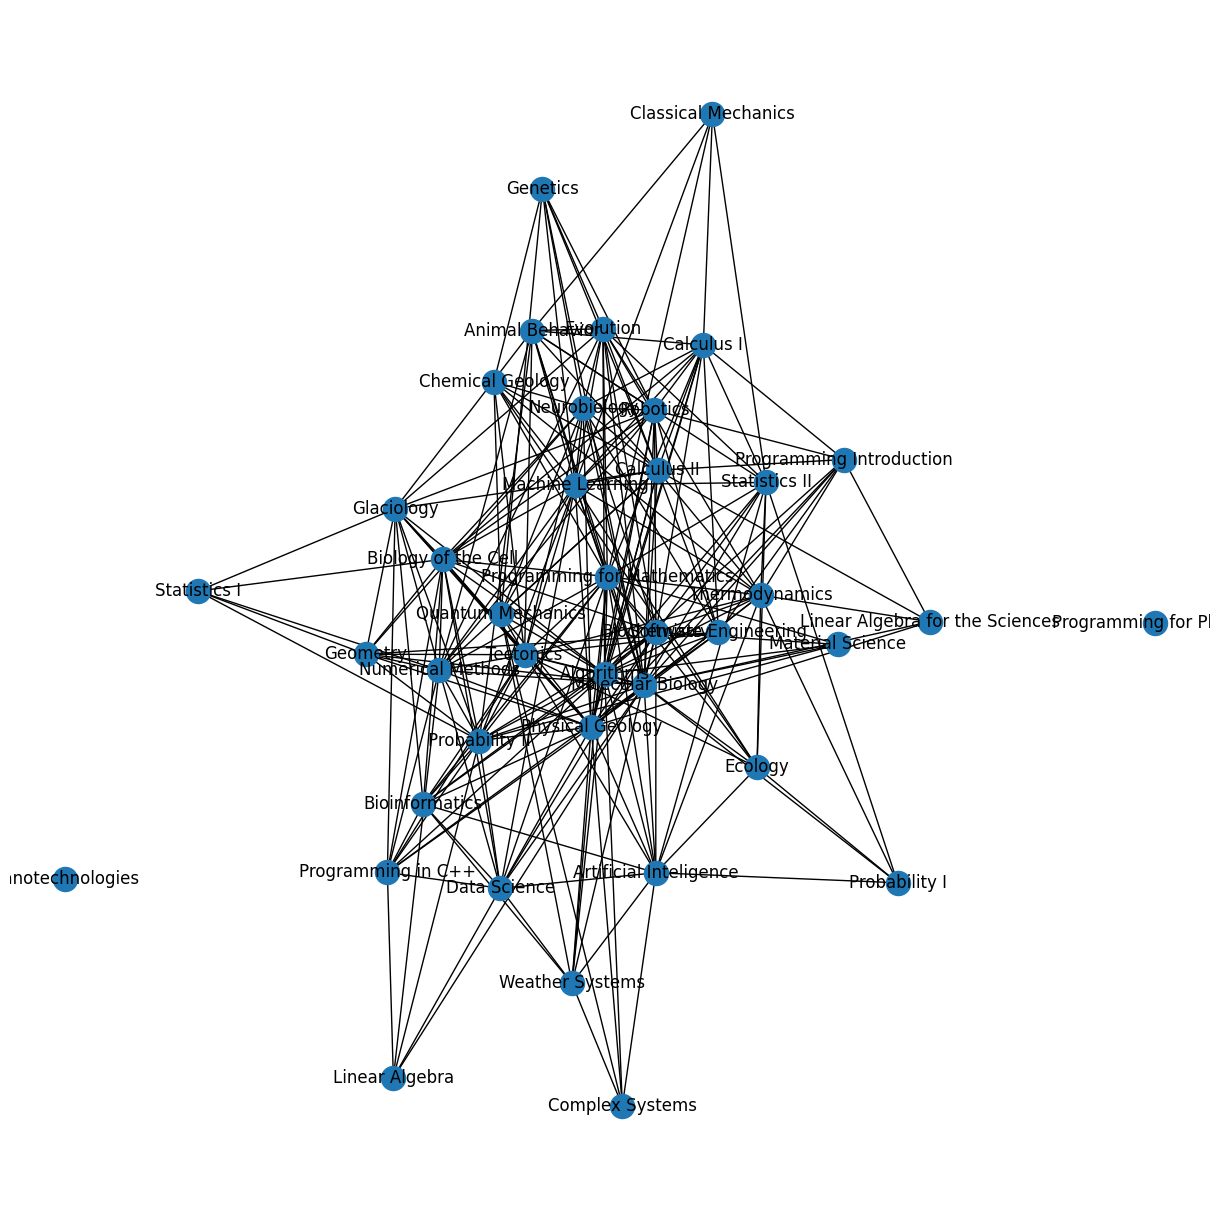

In [84]:
fig = plt.figure(figsize=(12,12))
pos = nx.spring_layout(class_network, k=0.4, iterations=20)
nx.draw(class_network, pos, with_labels=True)

In [88]:
deg = dict(class_network.degree)

In [89]:
deg

{'Biology of the Cell': 17,
 'Molecular Biology': 27,
 'Evolution': 14,
 'Biochemistry': 17,
 'Neurobiology': 15,
 'Animal Behavior': 13,
 'Genetics': 8,
 'Bioinformatics': 12,
 'Quantum Mechanics': 10,
 'Thermodynamics': 16,
 'Classical Mechanics': 5,
 'Programming for Physics': 0,
 'Linear Algebra for the Sciences': 5,
 'Complex Systems': 5,
 'Material Science': 5,
 'Nanotechnologies': 0,
 'Robotics': 16,
 'Calculus I': 14,
 'Calculus II': 18,
 'Probability I': 5,
 'Probability II': 18,
 'Statistics I': 5,
 'Statistics II': 13,
 'Linear Algebra': 5,
 'Geometry': 10,
 'Programming for Mathematics': 22,
 'Programming Introduction': 9,
 'Algorithms': 23,
 'Software Engineering': 10,
 'Programming in C++': 11,
 'Numerical Methods': 17,
 'Data Science': 13,
 'Machine Learning': 21,
 'Artificial Inteligence': 14,
 'Ecology': 9,
 'Chemical Geology': 9,
 'Physical Geology': 26,
 'Glaciology': 14,
 'Tectonics': 18,
 'Weather Systems': 9}

In [91]:
graph_coloring = nx.greedy_color(class_network)
unique_colors = set(graph_coloring.values())

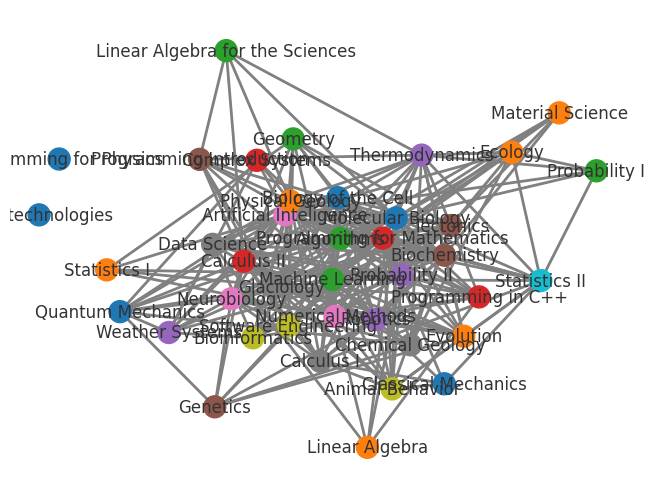

In [103]:
graph_color_to_mpl_color = dict(zip(unique_colors, mpl.TABLEAU_COLORS))
node_colors = [graph_color_to_mpl_color[graph_coloring[n]] for n in class_network.nodes()]

pos = nx.spring_layout(class_network, k=0.7, iterations=20)
nx.draw(
        class_network,
        pos,
        with_labels=True,
        node_size=250,
        node_color=node_colors,
        edge_color='grey',
        font_size=12,
        font_color='#333333',
        width=2
        )
plt.show()

In [106]:
graph_coloring

{'Molecular Biology': 0,
 'Physical Geology': 1,
 'Algorithms': 2,
 'Programming for Mathematics': 3,
 'Machine Learning': 2,
 'Calculus II': 3,
 'Probability II': 4,
 'Tectonics': 5,
 'Biology of the Cell': 0,
 'Biochemistry': 5,
 'Numerical Methods': 6,
 'Thermodynamics': 4,
 'Robotics': 4,
 'Neurobiology': 6,
 'Evolution': 1,
 'Calculus I': 7,
 'Artificial Inteligence': 6,
 'Glaciology': 7,
 'Animal Behavior': 8,
 'Statistics II': 9,
 'Data Science': 7,
 'Bioinformatics': 8,
 'Programming in C++': 3,
 'Quantum Mechanics': 0,
 'Geometry': 2,
 'Software Engineering': 8,
 'Programming Introduction': 5,
 'Ecology': 1,
 'Chemical Geology': 7,
 'Weather Systems': 4,
 'Genetics': 5,
 'Classical Mechanics': 0,
 'Linear Algebra for the Sciences': 2,
 'Complex Systems': 3,
 'Material Science': 1,
 'Probability I': 2,
 'Statistics I': 1,
 'Linear Algebra': 1,
 'Programming for Physics': 0,
 'Nanotechnologies': 0}

In [105]:
enrollment[0]

['Vanessa Harris',
 ['Molecular Biology',
  'Material Science',
  'Algorithms',
  'Programming for Mathematics',
  'Biochemistry',
  'Probability II']]

In [108]:
exams = {}
for s in enrollment:
    schedule = []
    for c in s[1]:
        schedule.append(f'{c} on day {graph_coloring[c]}')
    exams[s[0]] = schedule
        

In [110]:
exams['Vanessa Harris']

['Molecular Biology on day 0',
 'Material Science on day 1',
 'Algorithms on day 2',
 'Programming for Mathematics on day 3',
 'Biochemistry on day 5',
 'Probability II on day 4']